In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, encoding="utf-8")
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


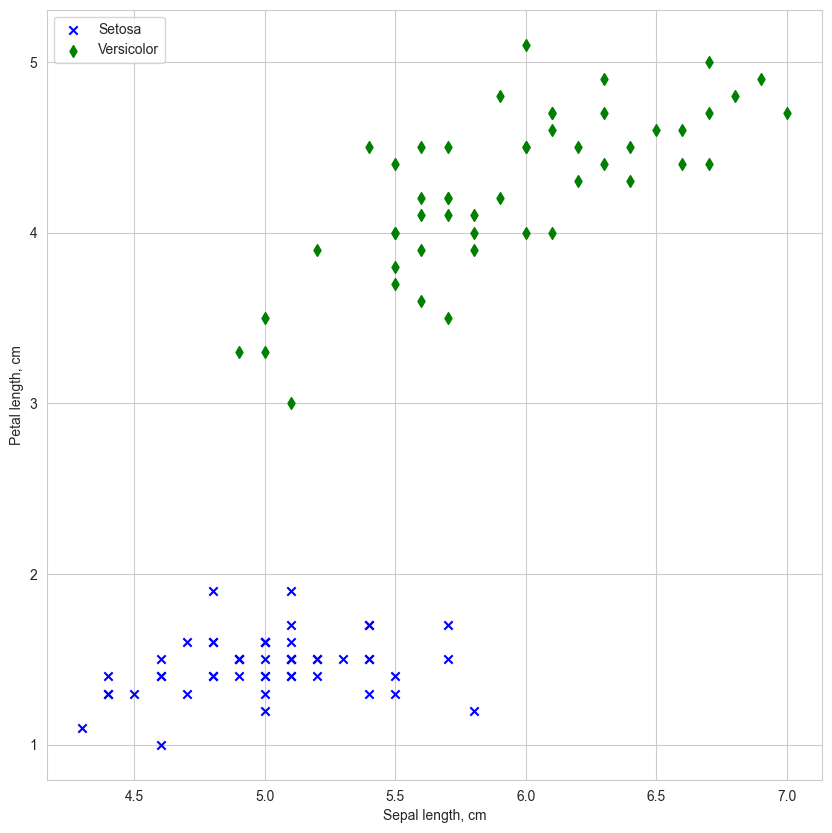

In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values

plt.figure(figsize=(10, 10))
plt.scatter(X[:50, 0], X[:50, 1], color="blue", marker="x", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="d", label="Versicolor")
plt.xlabel("Sepal length, cm")
plt.ylabel("Petal length, cm")
plt.legend(loc="upper left")
plt.show();

In [4]:
import numpy as np

class SimplePerceptronClassifier(object):
    """
    Simple Perceptron Classifier.

    Parameters:
        lr: float
            Learning rate (range between 0.0 and 1.0).
        epochs: int
            Number of passes through training sample.
        random_state: int
            Random number pseudo generator for random weight initialization.

    Attributes:
        w_ : 1d ndarray
            Weights after training epoch
        b_: Scalar value
            Bias after training epoch
        errors_ : list
            Number of missclassified samples for each epoch (iteration)
    """
    def __init__(self, lr=0.01, epochs=50, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """
        Training function for X - feature array and y - array of binary classes.
        :param X: {array-like}, shape = [n_rows, n_cols]
            Training vectors, where n_rows is the number of observations in the sample
            and n_cols is the number of features in the sample (e.g. height, weight and etc.)
        :param y: array-like, shape = [n_rows]
            Target variable with real classes (labels)
        :return: self.object
        """
        random_generator = np.random.RandomState(self.random_state)
        self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0.0
            for x_i, label in zip(X, y):
                update = self.lr * (label - self.predict(x_i))
                self.w_ += update * x_i
                self.b_ += update
                errors += int(update != 0.0)
            print("Epoch {}: \nError: {}\n".format(_, float(errors)))
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


perceptron_classifier_instance = SimplePerceptronClassifier(lr=0.01, epochs=20)

In [5]:
def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red", "green", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x_1_minima, x_1_maxima = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_2_minima, x_2_maxima = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx_1, xx_2 = np.meshgrid(np.arange(x_1_minima, x_1_maxima, resolution), np.arange(x_2_minima, x_2_maxima, resolution))
    regions = classifier.predict(np.array([xx_1.ravel(), xx_2.ravel()]).T)
    regions = regions.reshape(xx_1.shape)
    plt.contourf(xx_1, xx_2, regions, alpha=0.3, cmap=cmap)
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())

    for i, label in enumerate(np.unique(y)):
        plt.scatter(x=X[y == label, 0], y=X[y == label, 1], alpha=0.8, c=colors[i], marker=markers[i], label=f'Класс {label}', edgecolor='black')

# Реализация AdaLine

In [6]:
class AdaLine(object):
    """
    AdaLine (Adaptive Linear Unit) algorithm with simple
    gradient descent optimization rule.

    Parameters:
        lr: float
            Learning rate (range between 0.0 and 1.0)
        epochs: int
            Number of iterations through the training dataset
        random_state: int
            Random number pseudo generator for random weight initialization.

    Attributes:
        w_ : 1D array
            Weights after training epoch
        b_ : Scalar value
            Bias after training epoch
        losses_: list
            Mean Squared Error loss function for each epoch (iteration)
    """
    def __init__(self, lr=0.01, epochs=50, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """
        Training function for X - feature array and y - array of binary classes.
        :param X: {array-like}, shape = [n_rows, n_cols]
            Training vectors, where n_rows is the number of observations in the sample
            and n_cols is the number of features in the sample (e.g. height, weight and etc.)
        :param y: array-like, shape = [n_rows]
            Target variable with real classes (labels)
        :return: self.object
        """
        random_generator = np.random.RandomState(self.random_state)
        self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.lr * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.lr * 2.0 * errors.mean()
            loss = (errors ** 2).mean()
            self.losses_.append(loss)
            print(f"Epoch:  {epoch + 1}         error:   {round(np.mean(errors), 3)}           loss: {round(loss, 3)}")
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [7]:
# Normilizing and training
X_std = np.copy(X)
X_std[:,0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:, 1] - X[:,1].mean()) / X[:,1].std()

In [8]:
adaline_model = AdaLine(epochs=20, lr=0.1)
adaline_model.fit(X_std, y);

Epoch:  1         error:   0.5           loss: 0.498
Epoch:  2         error:   0.4           loss: 0.289
Epoch:  3         error:   0.32           loss: 0.181
Epoch:  4         error:   0.256           loss: 0.122
Epoch:  5         error:   0.205           loss: 0.089
Epoch:  6         error:   0.164           loss: 0.068
Epoch:  7         error:   0.131           loss: 0.055
Epoch:  8         error:   0.105           loss: 0.047
Epoch:  9         error:   0.084           loss: 0.041
Epoch:  10         error:   0.067           loss: 0.037
Epoch:  11         error:   0.054           loss: 0.034
Epoch:  12         error:   0.043           loss: 0.031
Epoch:  13         error:   0.034           loss: 0.029
Epoch:  14         error:   0.027           loss: 0.028
Epoch:  15         error:   0.022           loss: 0.026
Epoch:  16         error:   0.018           loss: 0.025
Epoch:  17         error:   0.014           loss: 0.024
Epoch:  18         error:   0.011           loss: 0.023
Epoch:

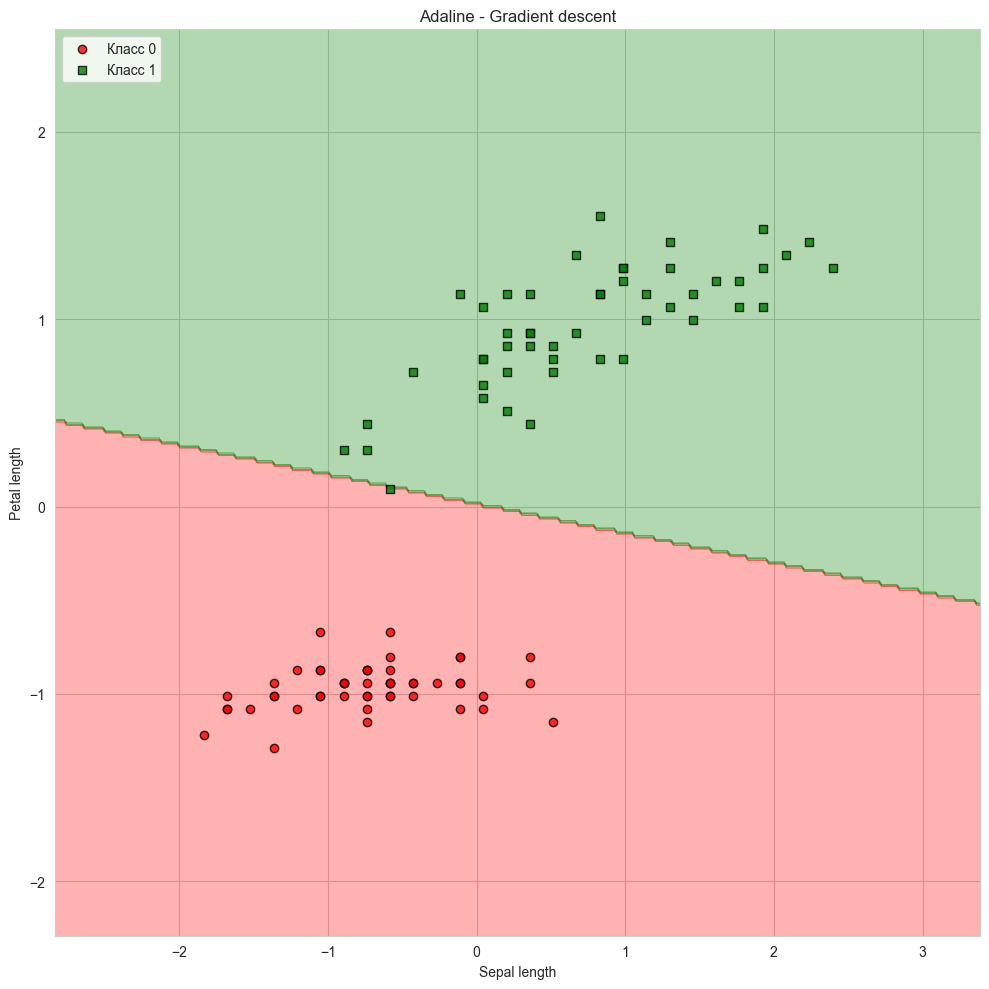

In [9]:
plt.figure(figsize=(10, 10))
plot_decision_boundary(X_std, y, classifier=adaline_model)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();


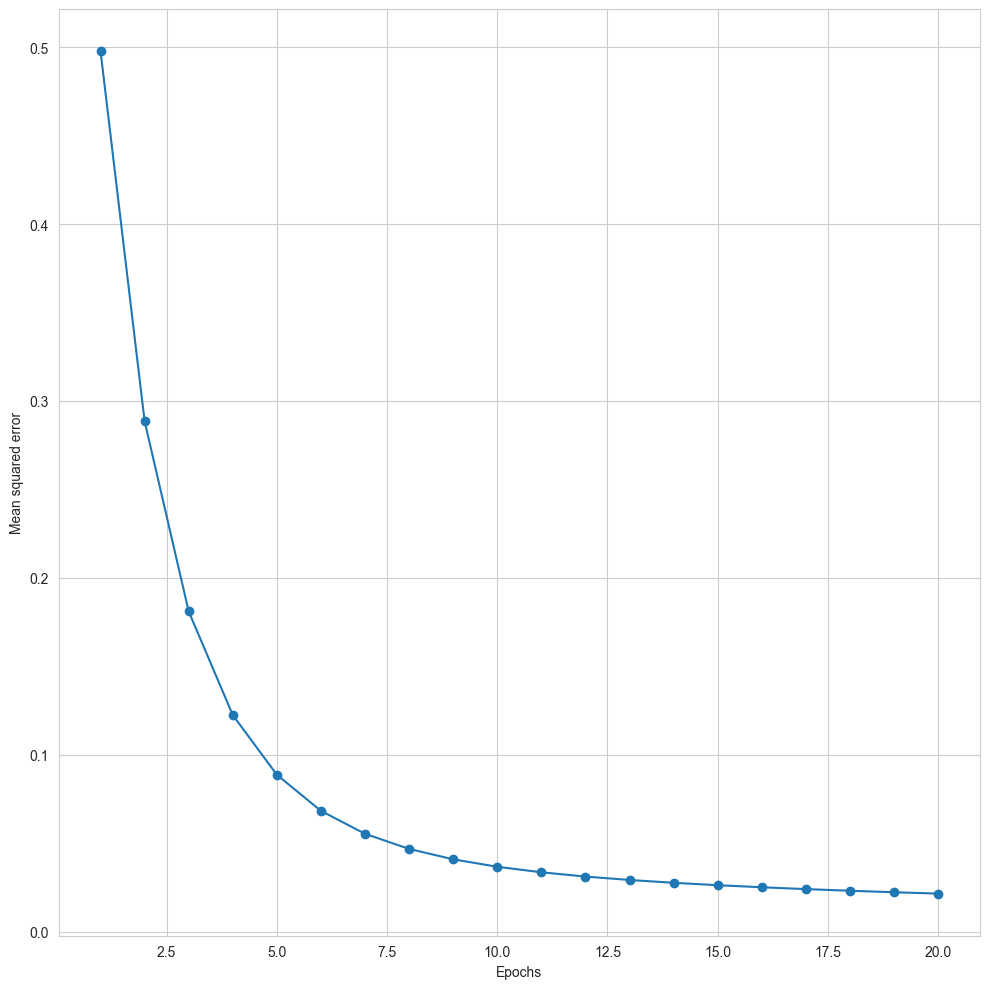

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(adaline_model.losses_) + 1), adaline_model.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show();